In [1]:
# Importing the NLP library
#!pip install spacy
import spacy

In [15]:
# SpaCy provides trained models for several languages. Load the large English NLP model
nlp = spacy.load('en_core_web_lg')

# The variable nlp is an object that gives us access to all the functions of spaCy. 

# Extracting Entities

In [16]:
# Sample text that we want to examine

text = """London is the capital and most populous city of England and 
the United Kingdom.  Standing on the River Thames in the south east 
of the island of Great Britain, London has been a major settlement 
for two millennia. It was founded by the Romans, who named it Londinium.
"""

In [46]:
# Parse the text with spaCy. This runs the entire pipeline.
doc = nlp(text)

# 'doc' now contains a parsed version of text. We can use it to do anything we want!
# For example, this will print out all the named entities that were detected:
for entity in doc.ents:
    print(f"{entity.text} ({entity.label_})")

London (GPE)
England (GPE)
the United Kingdom (GPE)
the River Thames (LOC)
Great Britain (GPE)
London (GPE)
two millennia (DATE)
Romans (NORP)
Londinium (LOC)


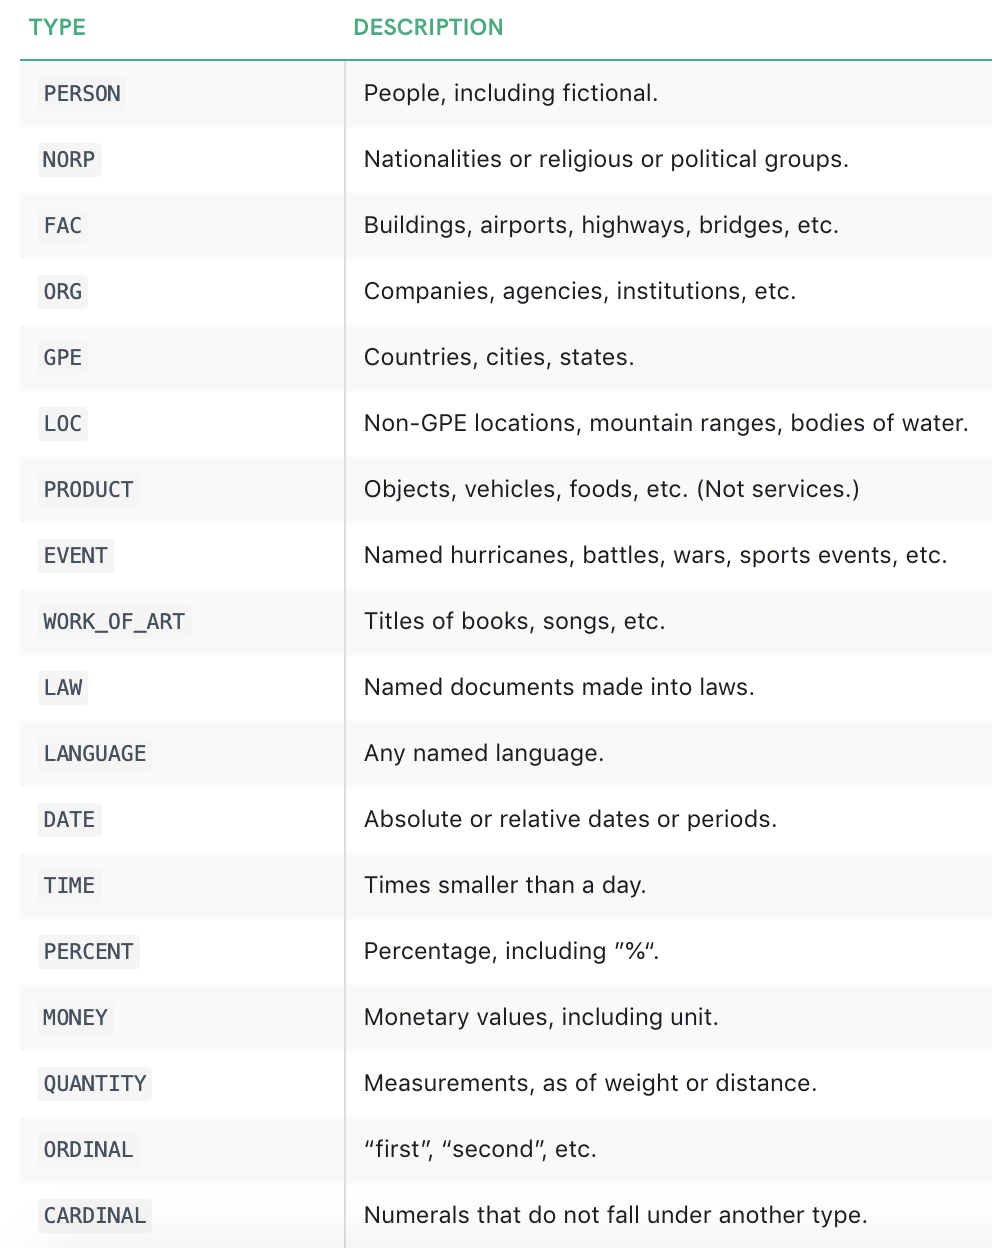

In [18]:
# NER description

from IPython.display import Image
Image(filename='ner.png')

# Data Scrubber

In [25]:
# Replace a token with "REDACTED" if it is a name
def replace_name_with_placeholder(token): 
    if token.ent_iob != 0 and token.ent_type_ == "PERSON": 
        return "[REDACTED] "
    else:
        return token.string
    
# token.ent_iob indicates whether an entity starts, continues or ends on the tag. 
# If no entity type is set on a token, it will return an empty string

In [38]:
# Loop through all the entities in a document and check if they are names
def scrub(text):
    doc = nlp(text)
    for ent in doc.ents:
        ent.merge()
    tokens = map(replace_name_with_placeholder, doc)
    return "".join(tokens)

# We are using a for loop to loop through all the entities in the document and calling ent.merge() on each one.
# This combines into one single token any tokens that are part of the same entity. 
# This way we re-place each persons name with a single [REDACTED] string instead of replacing the first name and last name separately with two different [REDACTED] strings.

In [39]:
# Sample text where we want to replace names

s = """
In 1950, Alan Turing published his famous article "Computing Machinery and Intelligence". In 1957, Noam Chomsky’s 
Syntactic Structures revolutionized Linguistics with 'universal grammar', a rule based system of syntactic structures.
"""

print(scrub(s))


In 1950, [REDACTED] published his famous article "Computing Machinery and Intelligence". In 1957, [REDACTED] 
Syntactic Structures revolutionized Linguistics with 'universal grammar', a rule based system of syntactic structures.

